In [3]:
# импортировали библиотеки
import pandas as pd
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# подгрузили файл
purchases = pd.read_csv('png_magnit_purchases.csv')
# посмотрели размеры дс
purchases.shape

(14441625, 9)

In [7]:
# посмотрели форматы данных в дс
purchases.dtypes

purchase date       object
customer            object
product             object
other_product      float64
p&g_product        float64
cost_product       float64
cost_p&g           float64
product_segment    float64
p&g_segment        float64
dtype: object

In [8]:
# импортнули еще одну библиотеку
import datetime as dt

In [9]:
# поменяли тип данных object на datatime
purchases.astype({'purchase date': 'datetime64[ns]'})
# посмотрели период, за который представлены данные
x = min(purchases['purchase date'])
y = max(purchases['purchase date'])
x,y

('2021-01-01', '2021-12-31')

In [10]:
# подгрузили дс с информацией о клиентах
customers = pd.read_csv('png_magnit_customers.csv')
# посмотрели его размер
customers.shape

(352547, 5)

In [11]:
# замерджили таблицы по кличевому показателю - id customer
data = pd.merge(purchases, customers, how='left', left_on='customer', right_on='customer')
data.shape
data.head(20)

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment,customer_age_group,gender,enr_channel,enr_date
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,NaN,2.0,NaN,[51 and more],M,Mobile App,2019-11-01
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,NaN,3.0,NaN,[31 - 35],M,SMS,2019-11-07
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,NaN,3.0,NaN,[21 - 25],F,SMS,2019-12-14
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,NaN,3.0,NaN,[31 - 35],F,SMS,2020-06-16
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,NaN,3.0,NaN,[31 - 35],F,Customer Web Portal,2020-05-24
5,2021-09-15,684b831e603b0d889bd9,Аэрозольные освежители воздуха,1.0,0.0,-0.179604,NaN,2.0,NaN,[26 - 30],M,Mobile App,2021-01-12
6,2021-01-16,c86ff194c1319f7cdd0f,Краска для волос,1.0,0.0,0.323252,NaN,3.0,NaN,[26 - 30],U,Mobile App,2020-02-01
7,2021-03-15,f034479e6079e3b5384f,Тампоны,1.0,0.0,0.206153,NaN,2.0,NaN,[21 - 25],M,Mobile App,2020-10-31
8,2021-04-15,949e6222dea8c57c7e1d,Чулочно-носочные изделия,1.0,0.0,1.166038,NaN,4.0,NaN,[51 and more],U,SMS,2019-10-25
9,2021-11-27,6af55ee530fc1264717f,Товары для хранения вещей,1.0,0.0,0.411781,NaN,4.0,NaN,[41 - 45],F,Mobile App,2021-04-02


In [12]:
data.astype({'purchase date': 'datetime64[ns]'})
data.dtypes

purchase date          object
customer               object
product                object
other_product         float64
p&g_product           float64
cost_product          float64
cost_p&g              float64
product_segment       float64
p&g_segment           float64
customer_age_group     object
gender                 object
enr_channel            object
enr_date               object
dtype: object

In [52]:
categories_ammount_all = data['product'].unique()
categories_ammount_all

array(['Бумажные салфетки', 'Мыло кусковое', 'Упаковка подарков',
       'Соли для душа', 'Маски для лица',
       'Аэрозольные освежители воздуха', 'Краска для волос', 'Тампоны',
       'Чулочно-носочные изделия', 'Товары для хранения вещей',
       'Подгузники', 'Кремы', 'Фильтры для воды и аксессуары',
       'Развивающие игрушки', 'Туалетная бумага',
       'Средства для борьбы с летающими насекомыми', 'Мыло жидкое',
       'Прокладки', 'Принадлежности для рисования', 'Бижутерия',
       'Чистящие средства', 'Бальзамы и кондиционеры', 'Женские гели',
       'Хозяйственные товары для уборки', 'Защитная одежда и аксессуары',
       'Влажные корма для кошек и котят', 'Влажные салфетки',
       'Уход за обувью', 'Лечение волос', 'Одеколоны, духи, воды',
       'Шампуни', 'Ополаскиватели для белья', 'Для бритья',
       'Пасты зубные', 'Дезодоранты женские',
       'Автоматические освежители воздуха', 'Для ногтей',
       'Дезодоранты мужские', 'Увлажнение и питание кожи рук',
       'С

In [51]:
ff = len(categories_ammount_all)
ff

393

In [13]:
# отфильтровали дс по полу (ж)
women_data = data.query("gender=='F'")
# создали список уникальных значений столбца product
categories_w = women_data['product'].unique()
# посмотрели количество категорий
a = len(categories_w)
# длина а = 389
# импорнули библиотеку для каунтера
from collections import Counter
# посмотрели, сколько значений в каждой категории
array = women_data['product']
# посмотрели топ-39 категорий покупок у женщин; учитывая мужские 10% (топ-37), берем усредненное топ-38
categories_ammount_w_top10 = Counter(array).most_common(38)
categories_ammount_w_top10

[('Туалетная бумага', 414229),
 ('Хозяйственные товары для уборки', 312107),
 ('Пасты зубные', 300495),
 ('Шампуни', 293341),
 ('Прокладки', 273223),
 ('Влажные корма для кошек и котят', 255860),
 ('Чистящие средства', 235827),
 ('Краска для волос', 230939),
 ('Чулочно-носочные изделия', 228915),
 ('Дезодоранты женские', 220014),
 ('Ватная продукция', 218281),
 ('Влажные салфетки', 212311),
 ('Средства для ручного мытья посуды', 208920),
 ('Прокладки ежедневные', 199405),
 ('Мыло жидкое', 183697),
 ('Мыло кусковое', 174863),
 ('Сухие корма для кошек и котят', 157982),
 ('Женские гели', 155999),
 ('Для глаз', 147524),
 ('Сухие средства для стирки', 146106),
 ('Бумажные салфетки', 145099),
 ('Ополаскиватели для белья', 142100),
 ('Для губ', 140853),
 ('Маски для лица', 132214),
 ('Бальзамы и кондиционеры', 128837),
 ('Очищение', 126089),
 ('Для ногтей', 121929),
 ('Дезинфицирующие средства для сантехники', 121158),
 ('Блоки для унитаза', 120264),
 ('Бритвы и лезвия', 119295),
 ('Кремы', 

In [15]:
# фильтруем женский дата сет по возрасту 18-20
women_data_18_20 = women_data.query("customer_age_group=='[18 - 20]'")
# присваеваем переменную array10 столбцу product и ищем топ-10 значений
array10 = women_data_18_20['product']
categories_ammount_w_top10_18_20 = Counter(array10).most_common(10)

# фильтруем женский дата сет по возрасту 21-25
women_data_21_25 = women_data.query("customer_age_group=='[21 - 25]'")
# присваеваем переменную array11 столбцу product и ищем топ-10 значений
array11 = women_data_21_25['product']
categories_ammount_w_top10_21_25 = Counter(array11).most_common(10)

# фильтруем женский дата сет по возрасту 26-30
women_data_26_30 = women_data.query("customer_age_group=='[26 - 30]'")
# присваеваем переменную array12 столбцу product и ищем топ-10 значений
array12 = women_data_26_30['product']
categories_ammount_w_top10_26_30 = Counter(array12).most_common(10)

# фильтруем женский дата сет по возрасту 31-35
women_data_31_35 = women_data.query("customer_age_group=='[31 - 35]'")
# присваеваем переменную array13 столбцу product и ищем топ-10 значений
array13 = women_data_31_35['product']
categories_ammount_w_top10_31_35 = Counter(array13).most_common(10)

# фильтруем женский дата сет по возрасту 36-40
women_data_36_40 = women_data.query("customer_age_group=='[36 - 40]'")
# присваеваем переменную array14 столбцу product и ищем топ-10 значений
array14 = women_data_36_40['product']
categories_ammount_w_top10_36_40 = Counter(array14).most_common(10)

# фильтруем женский дата сет по возрасту 41-45
women_data_41_45 = women_data.query("customer_age_group=='[41 - 45]'")
# присваеваем переменную array15 столбцу product и ищем топ-10 значений
array15 = women_data_41_45['product']
categories_ammount_w_top10_41_45 = Counter(array15).most_common(10)

# фильтруем женский дата сет по возрасту 46-50
women_data_46_50 = women_data.query("customer_age_group=='[46 - 50]'")
# присваеваем переменную array16 столбцу product и ищем топ-10 значений
array16 = women_data_46_50['product']
categories_ammount_w_top10_46_50 = Counter(array16).most_common(10)

# фильтруем женский дата сет по возрасту 51 и больше
women_data_51_more = women_data.query("customer_age_group=='[51 and more]'")
# присваеваем переменную array17 столбцу product и ищем топ-10 значений
array17 = women_data_51_more['product']
categories_ammount_w_top10_51_more = Counter(array17).most_common(10)

In [16]:
# выводим результат 18-20
categories_ammount_w_top10_18_20

[('Прокладки', 6954),
 ('Шампуни', 6476),
 ('Туалетная бумага', 5328),
 ('Дезодоранты женские', 4535),
 ('Влажные салфетки', 4295),
 ('Маски для лица', 4250),
 ('Ватная продукция', 4230),
 ('Пасты зубные', 4002),
 ('Хозяйственные товары для уборки', 3647),
 ('Женские гели', 3644)]

In [17]:
# выводим результат 21-25
categories_ammount_w_top10_21_25

[('Шампуни', 25734),
 ('Прокладки', 24297),
 ('Туалетная бумага', 23911),
 ('Пасты зубные', 19094),
 ('Хозяйственные товары для уборки', 18557),
 ('Дезодоранты женские', 18283),
 ('Влажные салфетки', 17729),
 ('Ватная продукция', 17269),
 ('Маски для лица', 16118),
 ('Женские гели', 15654)]

In [18]:
# выводим результат 26-30
categories_ammount_w_top10_26_30

[('Туалетная бумага', 37074),
 ('Шампуни', 31779),
 ('Хозяйственные товары для уборки', 29542),
 ('Прокладки', 28577),
 ('Пасты зубные', 27606),
 ('Дезодоранты женские', 24442),
 ('Влажные салфетки', 23019),
 ('Ватная продукция', 22521),
 ('Чистящие средства', 22248),
 ('Чулочно-носочные изделия', 22033)]

In [19]:
# выводим результат 31-35
categories_ammount_w_top10_31_35

[('Туалетная бумага', 63969),
 ('Хозяйственные товары для уборки', 49856),
 ('Шампуни', 46769),
 ('Прокладки', 45453),
 ('Пасты зубные', 45226),
 ('Чулочно-носочные изделия', 37075),
 ('Дезодоранты женские', 36173),
 ('Чистящие средства', 36060),
 ('Влажные салфетки', 35987),
 ('Ватная продукция', 34827)]

In [20]:
# выводим результат 36-40
categories_ammount_w_top10_36_40

[('Туалетная бумага', 67405),
 ('Прокладки', 53959),
 ('Хозяйственные товары для уборки', 51464),
 ('Пасты зубные', 49678),
 ('Шампуни', 49563),
 ('Чулочно-носочные изделия', 40387),
 ('Ватная продукция', 37570),
 ('Чистящие средства', 37304),
 ('Дезодоранты женские', 36733),
 ('Влажные салфетки', 36399)]

In [21]:
# выводим результат 41-45
categories_ammount_w_top10_41_45

[('Туалетная бумага', 54915),
 ('Прокладки', 47705),
 ('Шампуни', 40541),
 ('Хозяйственные товары для уборки', 40495),
 ('Пасты зубные', 40317),
 ('Чулочно-носочные изделия', 32926),
 ('Краска для волос', 32374),
 ('Влажные корма для кошек и котят', 32340),
 ('Чистящие средства', 30870),
 ('Ватная продукция', 29625)]

In [22]:
# выводим результат 46-50
categories_ammount_w_top10_46_50

[('Туалетная бумага', 40534),
 ('Прокладки', 30926),
 ('Пасты зубные', 29927),
 ('Хозяйственные товары для уборки', 29723),
 ('Влажные корма для кошек и котят', 29673),
 ('Шампуни', 28740),
 ('Краска для волос', 26835),
 ('Чистящие средства', 23678),
 ('Чулочно-носочные изделия', 23378),
 ('Дезодоранты женские', 21913)]

In [23]:
# выводим результат 51+
categories_ammount_w_top10_51_more

[('Туалетная бумага', 120377),
 ('Влажные корма для кошек и котят', 105551),
 ('Хозяйственные товары для уборки', 88150),
 ('Пасты зубные', 84132),
 ('Краска для волос', 82912),
 ('Чистящие средства', 67743),
 ('Средства для ручного мытья посуды', 63853),
 ('Шампуни', 63224),
 ('Сухие корма для кошек и котят', 61990),
 ('Мыло кусковое', 56138)]

In [24]:
# для мужчин делаем то же самое, сначала аналитика топа товаров, покупаемых мужчинами в принципе
men_data = data.query("gender=='M'")
categories_m = men_data['product'].unique()
b = len(categories_m)
# при выводе b видим 372 значения, берем 10%, т.е. топ-37; учитывая женские топ-39, берем среднее - топ-38
array1 = men_data['product']
categories_ammount_m_top10 = Counter(array1).most_common(38)
categories_ammount_m_top10

[('Туалетная бумага', 137936),
 ('Пасты зубные', 104871),
 ('Хозяйственные товары для уборки', 103140),
 ('Шампуни', 91710),
 ('Чистящие средства', 75130),
 ('Средства для ручного мытья посуды', 70666),
 ('Влажные корма для кошек и котят', 67255),
 ('Мыло кусковое', 64823),
 ('Прокладки', 62676),
 ('Влажные салфетки', 59338),
 ('Ватная продукция', 59208),
 ('Сухие средства для стирки', 57570),
 ('Чулочно-носочные изделия', 55946),
 ('Мыло жидкое', 55697),
 ('Краска для волос', 52827),
 ('Бритвы и лезвия', 50770),
 ('Дезодоранты женские', 50235),
 ('Дезодоранты мужские', 50043),
 ('Бумажные салфетки', 45051),
 ('Сухие корма для кошек и котят', 44593),
 ('Ополаскиватели для белья', 44122),
 ('Прокладки ежедневные', 43095),
 ('Женские гели', 42125),
 ('Дезинфицирующие средства для сантехники', 39521),
 ('Зубные щетки и насадки', 36351),
 ('Блоки для унитаза', 35505),
 ('Жидкие средства для стирки', 34123),
 ('Для глаз', 31833),
 ('Бальзамы и кондиционеры', 31404),
 ('Для губ', 30361),
 ('

In [26]:
# далее аналитика возрастных категорий

# фильтруем мужской дата сет по возрасту 18-20
men_data_18_20 = men_data.query("customer_age_group=='[18 - 20]'")
# присваеваем переменную array20 столбцу product и ищем топ-10 значений
array20 = men_data_18_20['product']
categories_ammount_m_top10_18_20 = Counter(array20).most_common(10)

# фильтруем мужской сет по возрасту 21-25
men_data_21_25 = men_data.query("customer_age_group=='[21 - 25]'")
# присваеваем переменную array21 столбцу product и ищем топ-10 значений
array21 = men_data_21_25['product']
categories_ammount_m_top10_21_25 = Counter(array21).most_common(10)

# фильтруем мужской дата сет по возрасту 26-30
men_data_26_30 = men_data.query("customer_age_group=='[26 - 30]'")
# присваеваем переменную array22 столбцу product и ищем топ-10 значений
array22 = men_data_26_30['product']
categories_ammount_m_top10_26_30 = Counter(array22).most_common(10)

# фильтруем мужской дата сет по возрасту 31-35
men_data_31_35 = men_data.query("customer_age_group=='[31 - 35]'")
# присваеваем переменную array23 столбцу product и ищем топ-10 значений
array23 = men_data_31_35['product']
categories_ammount_m_top10_31_35 = Counter(array23).most_common(10)

# фильтруем мужской дата сет по возрасту 36-40
men_data_36_40 = men_data.query("customer_age_group=='[36 - 40]'")
# присваеваем переменную array24 столбцу product и ищем топ-10 значений
array24 = men_data_36_40['product']
categories_ammount_m_top10_36_40 = Counter(array24).most_common(10)

# фильтруем мужской дата сет по возрасту 41-45
men_data_41_45 = men_data.query("customer_age_group=='[41 - 45]'")
# присваеваем переменную array25 столбцу product и ищем топ-10 значений
array25 = men_data_41_45['product']
categories_ammount_m_top10_41_45 = Counter(array25).most_common(10)

# фильтруем мужской дата сет по возрасту 46-50
men_data_46_50 = men_data.query("customer_age_group=='[46 - 50]'")
# присваеваем переменную array26 столбцу product и ищем топ-10 значений
array26 = men_data_46_50['product']
categories_ammount_m_top10_46_50 = Counter(array26).most_common(10)

# фильтруем мужской дата сет по возрасту 51 и больше
men_data_51_more = men_data.query("customer_age_group=='[51 and more]'")
# присваеваем переменную array27 столбцу product и ищем топ-10 значений
array27 = men_data_51_more['product']
categories_ammount_m_top10_51_more = Counter(array27).most_common(10)

In [27]:
categories_ammount_m_top10_18_20

[('Туалетная бумага', 1585),
 ('Шампуни', 1504),
 ('Пасты зубные', 1166),
 ('Хозяйственные товары для уборки', 1096),
 ('Дезодоранты мужские', 1048),
 ('Мыло кусковое', 913),
 ('Бритвы и лезвия', 839),
 ('Средства для ручного мытья посуды', 777),
 ('Прокладки', 773),
 ('Чистящие средства', 771)]

In [28]:
categories_ammount_m_top10_21_25

[('Туалетная бумага', 23700),
 ('Шампуни', 17996),
 ('Пасты зубные', 17959),
 ('Хозяйственные товары для уборки', 17863),
 ('Чистящие средства', 13789),
 ('Средства для ручного мытья посуды', 13013),
 ('Прокладки', 12915),
 ('Влажные корма для кошек и котят', 12671),
 ('Краска для волос', 12223),
 ('Ватная продукция', 11676)]

In [29]:
categories_ammount_m_top10_26_30

[('Туалетная бумага', 20308),
 ('Хозяйственные товары для уборки', 15712),
 ('Пасты зубные', 15617),
 ('Шампуни', 15608),
 ('Чистящие средства', 11952),
 ('Прокладки', 10631),
 ('Средства для ручного мытья посуды', 10627),
 ('Ватная продукция', 9851),
 ('Влажные салфетки', 9582),
 ('Влажные корма для кошек и котят', 9542)]

In [30]:
categories_ammount_m_top10_31_35

[('Туалетная бумага', 22699),
 ('Хозяйственные товары для уборки', 17597),
 ('Пасты зубные', 16925),
 ('Шампуни', 15496),
 ('Чистящие средства', 12364),
 ('Средства для ручного мытья посуды', 11522),
 ('Прокладки', 10710),
 ('Влажные салфетки', 10427),
 ('Ватная продукция', 10214),
 ('Дезодоранты мужские', 9935)]

In [31]:
categories_ammount_m_top10_36_40

[('Туалетная бумага', 20008),
 ('Хозяйственные товары для уборки', 14983),
 ('Пасты зубные', 14434),
 ('Шампуни', 12488),
 ('Чистящие средства', 10531),
 ('Средства для ручного мытья посуды', 9286),
 ('Прокладки', 8917),
 ('Влажные салфетки', 8864),
 ('Мыло кусковое', 8706),
 ('Дезодоранты мужские', 8349)]

In [32]:
categories_ammount_m_top10_41_45

[('Туалетная бумага', 15240),
 ('Пасты зубные', 11805),
 ('Хозяйственные товары для уборки', 11413),
 ('Шампуни', 10030),
 ('Чистящие средства', 7916),
 ('Прокладки', 7555),
 ('Средства для ручного мытья посуды', 7448),
 ('Мыло кусковое', 7267),
 ('Влажные корма для кошек и котят', 6773),
 ('Влажные салфетки', 6506)]

In [33]:
categories_ammount_m_top10_46_50

[('Туалетная бумага', 10864),
 ('Пасты зубные', 8125),
 ('Хозяйственные товары для уборки', 7465),
 ('Шампуни', 6509),
 ('Влажные корма для кошек и котят', 5526),
 ('Чистящие средства', 5293),
 ('Мыло кусковое', 5211),
 ('Средства для ручного мытья посуды', 5054),
 ('Прокладки', 4879),
 ('Сухие средства для стирки', 4279)]

In [34]:
categories_ammount_m_top10_51_more

[('Туалетная бумага', 23374),
 ('Пасты зубные', 18691),
 ('Хозяйственные товары для уборки', 16882),
 ('Влажные корма для кошек и котят', 15783),
 ('Средства для ручного мытья посуды', 12837),
 ('Мыло кусковое', 12614),
 ('Чистящие средства', 12409),
 ('Шампуни', 11969),
 ('Сухие средства для стирки', 10884),
 ('Сухие корма для кошек и котят', 10115)]

In [ ]:
# в планах: посмотреть какие товары P&G покупают лучше всего, подумать, как это привязать к матрице

In [35]:
# создали столбец месяца, поменяли дататайп на инт
data['month'] = data['purchase date'].str[5:7]
data['month'] = data['month'].astype(int)
data.head(20)

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment,customer_age_group,gender,enr_channel,enr_date,month
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,NaN,2.0,NaN,[51 and more],M,Mobile App,2019-11-01,12
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,NaN,3.0,NaN,[31 - 35],M,SMS,2019-11-07,11
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,NaN,3.0,NaN,[21 - 25],F,SMS,2019-12-14,1
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,NaN,3.0,NaN,[31 - 35],F,SMS,2020-06-16,12
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,NaN,3.0,NaN,[31 - 35],F,Customer Web Portal,2020-05-24,3
5,2021-09-15,684b831e603b0d889bd9,Аэрозольные освежители воздуха,1.0,0.0,-0.179604,NaN,2.0,NaN,[26 - 30],M,Mobile App,2021-01-12,9
6,2021-01-16,c86ff194c1319f7cdd0f,Краска для волос,1.0,0.0,0.323252,NaN,3.0,NaN,[26 - 30],U,Mobile App,2020-02-01,1
7,2021-03-15,f034479e6079e3b5384f,Тампоны,1.0,0.0,0.206153,NaN,2.0,NaN,[21 - 25],M,Mobile App,2020-10-31,3
8,2021-04-15,949e6222dea8c57c7e1d,Чулочно-носочные изделия,1.0,0.0,1.166038,NaN,4.0,NaN,[51 and more],U,SMS,2019-10-25,4
9,2021-11-27,6af55ee530fc1264717f,Товары для хранения вещей,1.0,0.0,0.411781,NaN,4.0,NaN,[41 - 45],F,Mobile App,2021-04-02,11


In [36]:
# сгруппировали по месяцам
data_group = data.groupby('month').sum()
# вывели распределение костов (выручки) по месяцам от продажи товаров магнит
data_group['cost_product']

month
1     -48072.423470
2     -55451.266375
3     -56488.144459
4     -36496.818552
5     -63962.768234
6     -71409.157110
7     -36646.012546
8      -4932.798061
9      39445.205061
10     80346.235036
11     90185.328138
12    163482.620573
Name: cost_product, dtype: float64

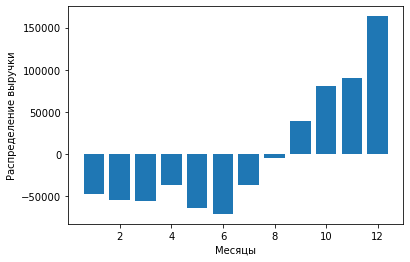

In [46]:
# распределение выручки от реализации продукции Магнит по месяцам 
month = range(1,13)
plt.bar(month, data_group['cost_product'])
plt.ylabel('Распределение выручки')
plt.xlabel('Месяцы')
plt.show()

In [38]:
# вывели распределние костов (выручки) по месяцам от продажи товаров p&g
data_group['cost_p&g']

month
1     -6029.956492
2     -4762.685573
3     -5671.708835
4       414.200961
5     -3871.353367
6     -7467.868285
7     -6288.582035
8     -4000.311753
9     -7317.273401
10    10389.266132
11    11614.359284
12    22991.913365
Name: cost_p&g, dtype: float64

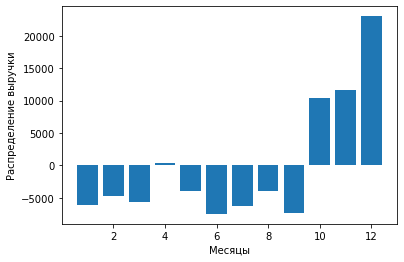

In [47]:
# распределение выручки от реализации продукции P&G по месяцам 
plt.bar(month, data_group['cost_p&g'])
plt.ylabel('Распределение выручки')
plt.xlabel('Месяцы')
plt.show()

In [41]:
data_seg_magnit = data.groupby('product_segment').sum()
data_seg_magnit

,other_product,p&g_product,cost_product,cost_p&g,p&g_segment,month
product_segment,,,,,,
1.000000,3217.0,0.0,-1.320888e-12,0.000000,0.0,17801
2.000000,3566918.0,47149.0,5.008105e-12,-6245.461602,85888.0,21762983
3.000000,9382921.0,60382.0,-2.470780e+04,-1279.862051,170967.0,50953543
3.142857,21.0,0.0,-5.253157e-01,0.000000,0.0,36
3.166666,18.0,0.0,-1.037910e+00,0.000000,0.0,23
3.181818,11.0,0.0,-1.459470e+00,0.000000,0.0,12
3.200000,85.0,0.0,-2.656921e+00,0.000000,0.0,136
3.222222,9.0,0.0,5.211914e-01,0.000000,0.0,1
3.250000,364.0,0.0,-1.519729e+01,0.000000,0.0,651


In [42]:
# надоелo
data_seg_pg = data.groupby('p&g_segment').sum()
data_seg_pg

,other_product,p&g_product,cost_product,cost_p&g,product_segment,month
p&g_segment,,,,,,
2.0,49753.0,866737.0,-1307.240650,-8.514150e-11,85888.0,5396699
3.0,71911.0,582917.0,3023.204459,3.207268e-12,170967.0,3755260


In [44]:
# отсортировали дс по убыванию выручки (а нафик оно нам надо?)
data_product = data.sort_values(by = ['cost_product'], ascending = False)
data_product

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment,customer_age_group,gender,enr_channel,enr_date,month
6986675,2021-11-12,54800b8d0ac3a3f48baf,Ватная продукция,1.0,0.0,118.905424,NaN,3.0,NaN,[36 - 40],F,SMS,2019-10-27,11
2460307,2021-09-10,dc59cfaba6715b492e02,Женские гели,4.0,0.0,88.018655,NaN,3.0,NaN,[41 - 45],M,Mobile App,2019-10-28,9
8829933,2021-07-26,6034939ee71dc7631a31,Антисептики,1.0,0.0,72.290957,NaN,2.0,NaN,[31 - 35],U,Customer Web Portal,2021-07-18,7
657335,2021-12-25,6274efec284f6e5f0f1d,Инсталляция,1.0,0.0,70.164153,NaN,4.0,NaN,[51 and more],F,SMS,2019-10-26,12
5772716,2021-02-11,363d650ddd7145667a7c,Туалетная бумага,1.0,0.0,64.343545,NaN,3.0,NaN,[21 - 25],U,Mobile App,2019-11-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441572,2021-08-17,42d8ecfb13eff63662ca,Прокладки,0.0,2.0,NaN,-0.162149,NaN,2.0,[36 - 40],F,Mobile App,2019-10-28,8
14441575,2021-08-06,7fc07307f1664e6df088,Дезодоранты мужские,0.0,1.0,NaN,-0.297810,NaN,3.0,[18 - 20],M,Mobile App,2021-05-11,8
14441582,2021-01-17,96aae6350bdadf0c9952,Прокладки,0.0,1.0,NaN,-0.045064,NaN,2.0,[51 and more],M,SMS,2019-11-22,1
14441593,2021-09-28,e4c9b4f3c1d4ec35c378,Прокладки ежедневные,0.0,1.0,NaN,-0.543514,NaN,2.0,[51 and more],F,SMS,2019-11-26,9
